<a href="https://colab.research.google.com/github/mohani98/Bank-customer-segmentation/blob/main/ML_Case_Study_Bank_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML Case Study**

Guidelines for the ML Case Study:

About the Project:

Welcome to the realm of hands-on machine learning! In this open-ended ML Case Study, you have the opportunity to explore the vast landscape of machine learning applications across diverse industries. Your mission is to select one project from the list of projects given below in the cheat sheet or propose your own project idea that aligns with your interests and aspirations. This project is your canvas to apply your machine learning skills, experiment with various algorithms, and demonstrate your ability to tackle real-world challenges using data-driven insights. Through this project, you'll showcase your autonomy, creativity, and technical prowess as you contribute to shaping the future with data-driven solutions.

Skills Required:

Proficiency in Python programming.
Familiarity with data manipulation libraries (e.g., pandas,numpy).
Knowledge of data visualisation tools (e.g., matplotlib, seaborn).
Understanding of machine learning concepts and clustering algorithms (e.g., K-means).
Ability to analyse and interpret data insights.
Strong report writing and presentation skills.


# **Rubrics for Assessment:**

# Data Exploration and Preprocessing:

>


Correct loading of data and handling of missing values.
Effective identification and handling of outliers if present.
# Feature Engineering:

>


Appropriate calculation of metrics and creation of new features.
Clear explanations for the chosen feature engineering strategies.
# Customer Segmentation:
Proper selection and application of the clustering algorithm.
Clear justification for the chosen number of clusters.
Accurate visualisation of customer segments.
# Interpretation and Analysis:
Thorough analysis of customer segments' characteristics.
Meaningful insights and observations drawn from the analysis.
Demonstration of critical thinking and depth of understanding.
# Recommendations:
Relevant and actionable recommendations for marketing strategies.
Alignment of recommendations with the analysis.
Visualisations and Reporting:
Effective visualisations that enhance the understanding of insights.
Clear, concise, and well-structured report or presentation.


# **Problem Statement:**

Imagine yourself as a freelance data scientist ready for the next project adventure. Your task is to select a machine learning project from the list provided or propose an original project idea that resonates with you. Your objective is to identify a specific challenge within the chosen industry domain and design a machine learning solution to address it. Whether you're predicting customer behavior, optimizing processes, or making healthcare more efficient, your project should demonstrate your ability to approach complex problems, preprocess and analyze relevant data, develop and fine-tune models, and interpret results in a meaningful way. Your project will be a testament to your adaptability, curiosity, and aptitude for machine learning.


# **Define the Problem Statement**


## Bank Customer Segmentation.

The dataset utilized comes from a german bank in 2016 collected by Professor Hoffman of the University of Califonia.

In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.

The original dataset required extensive cleaning and variable selection I due to its complicated system of categories and symbols. Several columns are simply ignored, because they were viewed as not important or their descriptions are obscure. The selected attributes are:

Age (numeric)




Sex (text: male, female)




Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)




Housing (text: own, rent, or free)




Saving accounts (text - little, moderate, quite rich, rich)

Checking account (numeric, in DM - Deutsch Mark)

Credit amount (numeric, in DM)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

# Objective:
The objective of this analysis is to segment the German bank's customers based on the various factors (variables) available in their database. And also Model Selection, Training & Evaluation.

The library makes use of the following packages:

pandas - to manipulate data frames

numpy - providing linear algebra

seaborm - to create visualizations

matplotlib - basic tools for visualizations

scikit-learn - machine learning library





# **Data Collection:**





In [ ]:
# Import relevant packages.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path to the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/MLproject/german_credit_data.csv'

In [ ]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

In [ ]:
# Dataset First Look
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


# Classify data as labeled or unlabeled based on availability:
**We can clearly see that the column 'Sex' is classified into two groups Male and Female. Therefore, this data is classify as labeled data (Supervised).**


# **Data Preprocessing:**

In [ ]:
# Show the mentioned columns of the dataset
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

# The Variables are as follows:-
Age (numeric)

Sex (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (numeric, in DM - Deutsch Mark)

Credit amount (numeric, in DM)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [ ]:
# Dataset Rows & Columns count

rows, columns = df.shape
print(f"The dataset has {rows} rows and {columns} columns.")

The dataset has 1000 rows and 10 columns.


In [ ]:
# Dataset Info
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB
None


In [ ]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()

# Display the count of duplicate rows
print(f"There are {duplicate_count} duplicate rows in the dataset.")

There are 0 duplicate rows in the dataset.


In [ ]:
# Missing Values/Null Values Count
# Display the count of missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values and their counts
missing_values = missing_values[missing_values > 0]
if not missing_values.empty:
    print("Columns with missing values:")
    print(missing_values)
else:
    print("No missing values in the dataset.")

Columns with missing values:
Saving accounts     183
Checking account    394
dtype: int64


<Axes: >

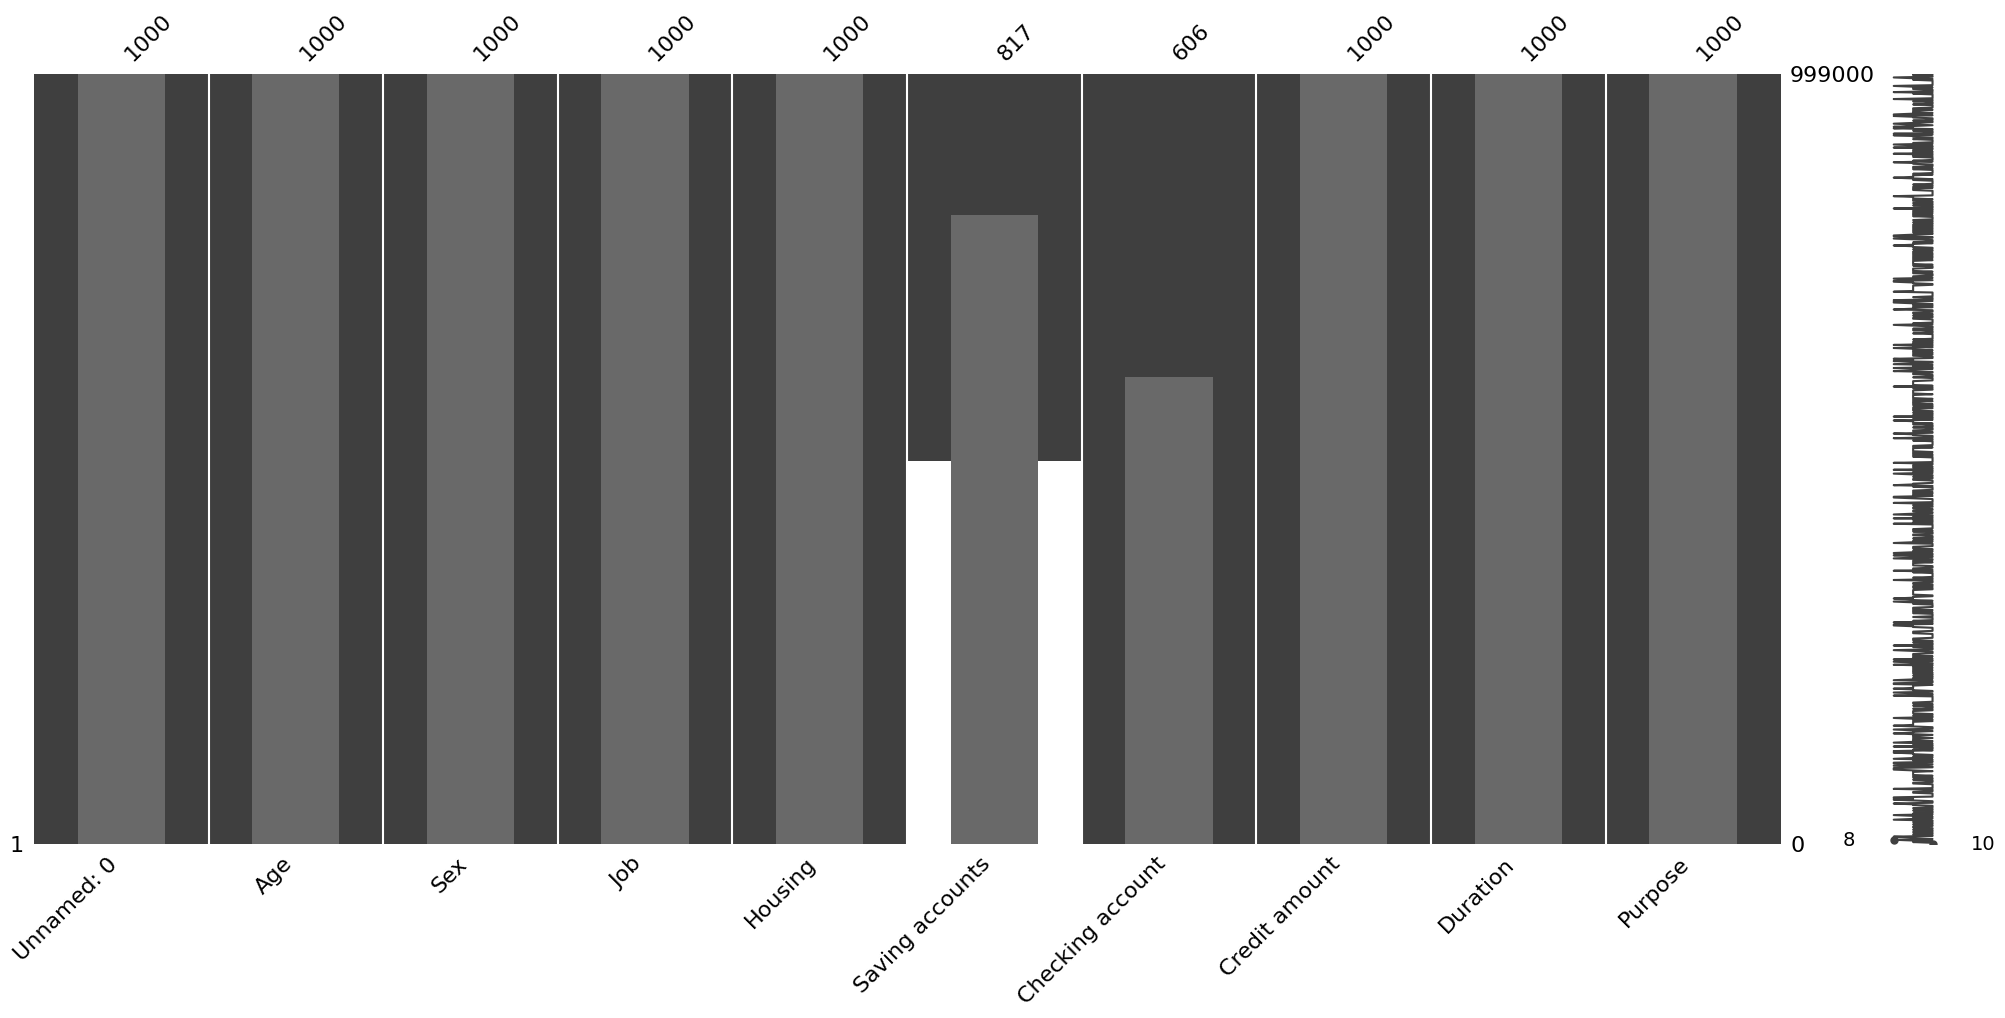

In [ ]:
# Visualizing the missing values
!pip install missingno

import missingno as msno

# Create a matrix to visualize missing values
msno.matrix(df)

# Display a bar chart to visualize missing values
msno.bar(df)

In [ ]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")

Unique values for Unnamed: 0:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 

In [ ]:
# Remove the first column as its unnecessary.

df.drop(['Unnamed: 0'], axis = 1, inplace = True)

df.head(5)



,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [ ]:
# Dataset Describe
# Display summary statistics of the numeric columns
df.describe()


,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [ ]:
# Get unique values & Value counts in the 'Housing' column.

df['Housing'].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [ ]:
# Get unique values & Value counts in the 'Saving accounts' column.

df['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [ ]:
# Get unique values & Value counts in the 'Checking account' column.

df['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [ ]:
# Get unique values & Value counts in the 'Purpose' column.

df['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

In [ ]:
# Fill the null value
df['Checking account'].fillna(value = 'not known', inplace = True)
df['Checking account'].isnull().sum()

0

In [ ]:
df['Saving accounts'].fillna(value = 'not known', inplace = True)
df['Saving accounts'].isnull().sum()

0

In [ ]:
# check whether the dataset having any other null value
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [ ]:
# Converting string values into numerical values.

df_num = df.copy()

# Coding strings.
df_num['Sex'] = df_num['Sex'].astype('category')
df_num['Sex'] = df_num['Sex'].cat.codes

df_num['Housing'] = df_num['Housing'].astype('category')
df_num['Housing'] = df_num['Housing'].cat.codes

df_num['Saving accounts'] = df_num['Saving accounts'].astype('category')
df_num['Saving accounts'] = df_num['Saving accounts'].cat.codes

df_num['Checking account'] = df_num['Checking account'].astype('category')
df_num['Checking account'] = df_num['Checking account'].cat.codes

df_num['Purpose'] = df_num['Purpose'].astype('category')
df_num['Purpose'] = df_num['Purpose'].cat.codes

In [ ]:
# Display the first few rows of the cleaned & transformed dataset
print("First few rows of the cleaned dataset:")
print(df.head())

First few rows of the cleaned dataset:
   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own       not known           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little        not known           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  
0         6             radio/TV  
1        48             radio/TV  
2        12            education  
3        42  furniture/equipment  
4        24                  car  


## **Exploratory Data Analysis**

In [ ]:
# A function which will generate plots for three numeric variables with stratification by gender by selected categorical column.

def scatters(data, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="Credit amount",y="Duration", hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="Age",y="Credit amount", hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="Age",y="Duration", hue=h, palette=pal, data=data, ax=ax3)
    plt.tight_layout()

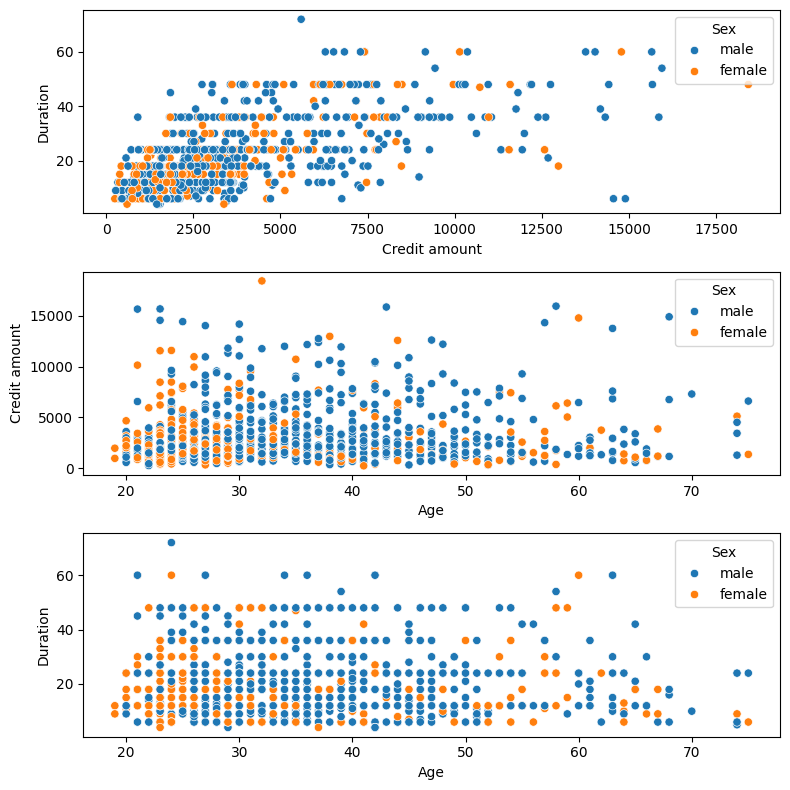

In [ ]:
# A scatterplot showing the stratification between Duration, Age and credit amount.

scatters(df, h = "Sex")

# Insights:
First impressions indicate that majority of men and women have the same credit amount & duration however a higher amount of men have a higher credit amount & duration compared to women.

There's not much indication of a correlation between age and credit amount and duration and age however majority of the women seem to be younger.

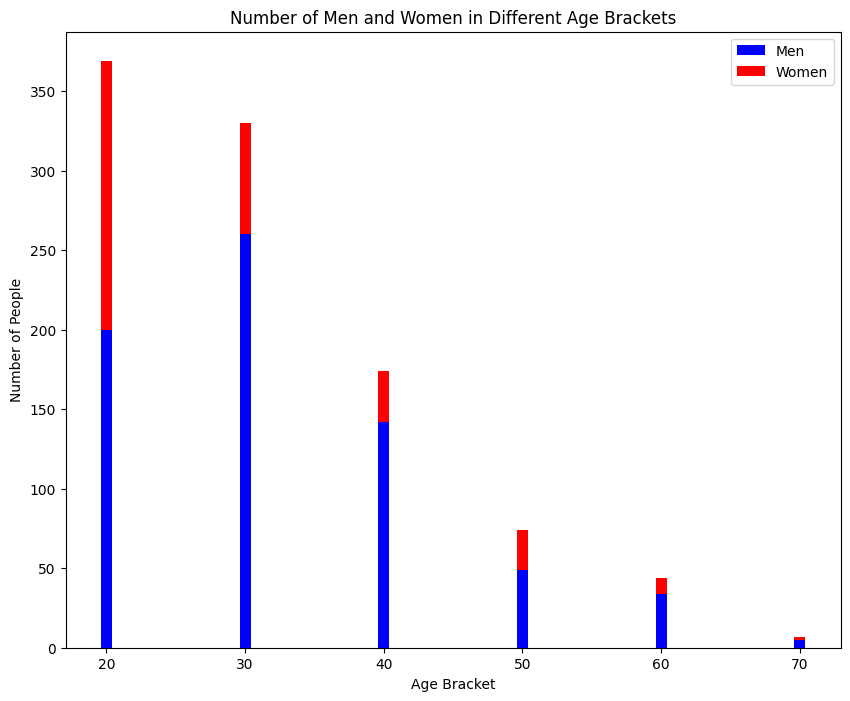

In [ ]:
# Discovery of the number of men and women in different age brackets.

age_brackets = [20, 30, 40, 50, 60, 70]
men_count = []
women_count = []
for bracket in age_brackets:
    men_count.append(len(df[(df['Age'] >= bracket) & (df['Age'] < bracket + 10) & (df['Sex'] == 'male')]))
    women_count.append(len(df[(df['Age'] >= bracket) & (df['Age'] < bracket + 10) & (df['Sex'] == 'female')]))

# Create a bar graph
plt.figure(figsize=(10, 8))
plt.bar(age_brackets, men_count, label='Men', color='blue')
plt.bar(age_brackets, women_count, bottom=men_count, label='Women', color='red')
plt.xlabel('Age Bracket')
plt.ylabel('Number of People')
plt.title('Number of Men and Women in Different Age Brackets')
plt.xticks(age_brackets)
plt.legend()
plt.show()

# Insight:
The visualization above indicates that although most of the women are between the age of 20-30, the men are more in all age brackets therefore explains why more men can be observed having a higher credit amount and duration.

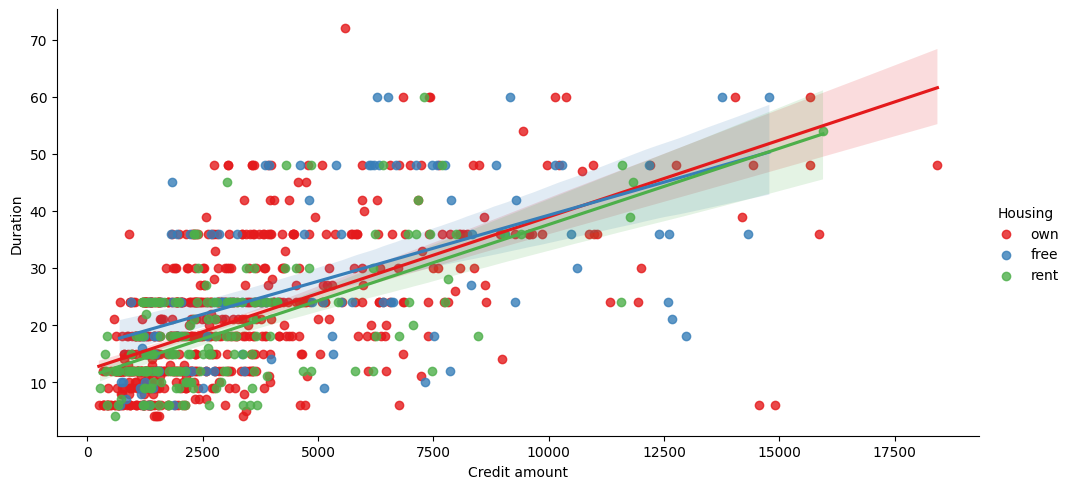

In [ ]:
# Credit amount & Duration x Housing.

sns.lmplot(x="Credit amount",y="Duration", hue="Housing", data=df, palette="Set1", aspect=2)
plt.show()

# Insight:
The visualization above shows that a majority of the customers that rent have a lower credit amount and duration.

The customers who own their houses have the highest credit amounts & duration as expected.

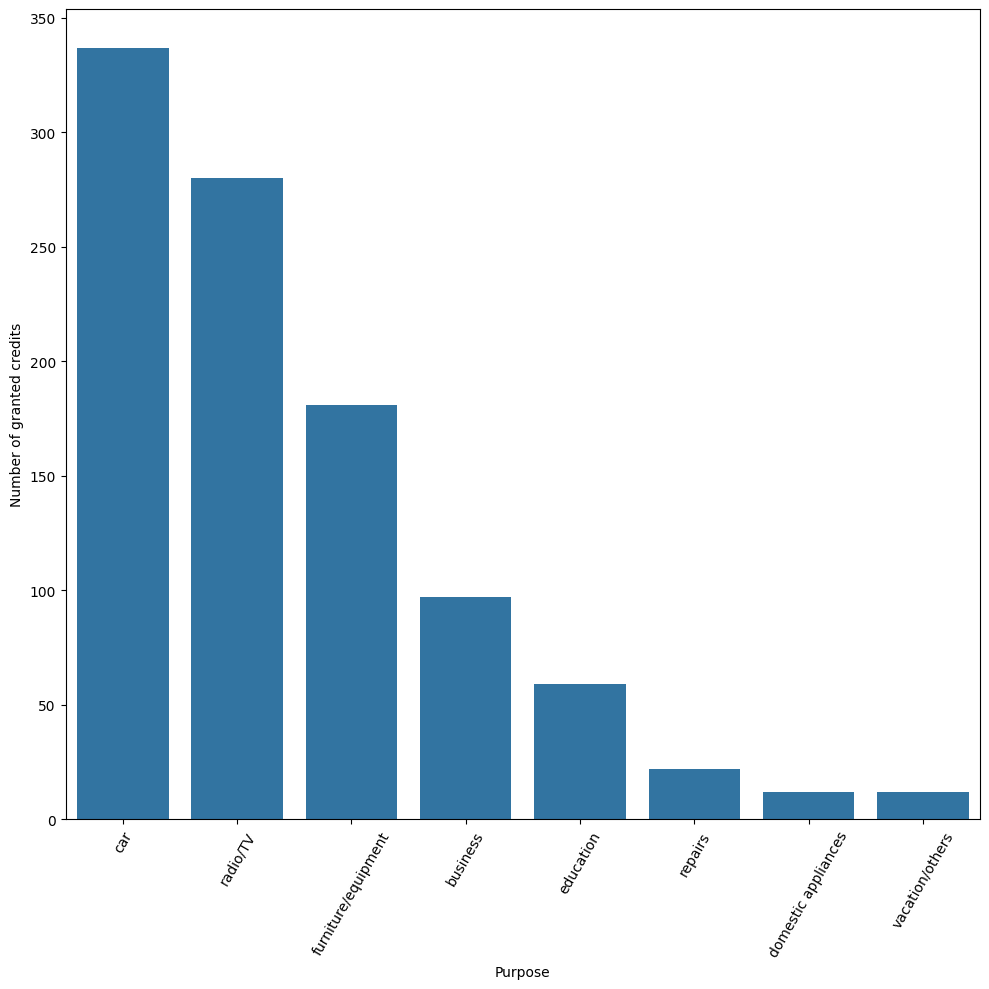

In [ ]:
# Loans granted for various purpose.

n_loans = df.groupby("Purpose")["Age"].count().rename("Count").reset_index()
n_loans.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,10))
bar = sns.barplot(x="Purpose",y="Count",data=n_loans)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Number of granted credits")
plt.tight_layout()

# Insights:
The barplot above shows how many loans granted for various purposes.

Most of loans were granted for car and radio/TV.

And the least number of credit garanted for repairs, domestic applicances and vacation/others.

In [ ]:
#Defining function that creates a boxplot.

def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, data=df)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

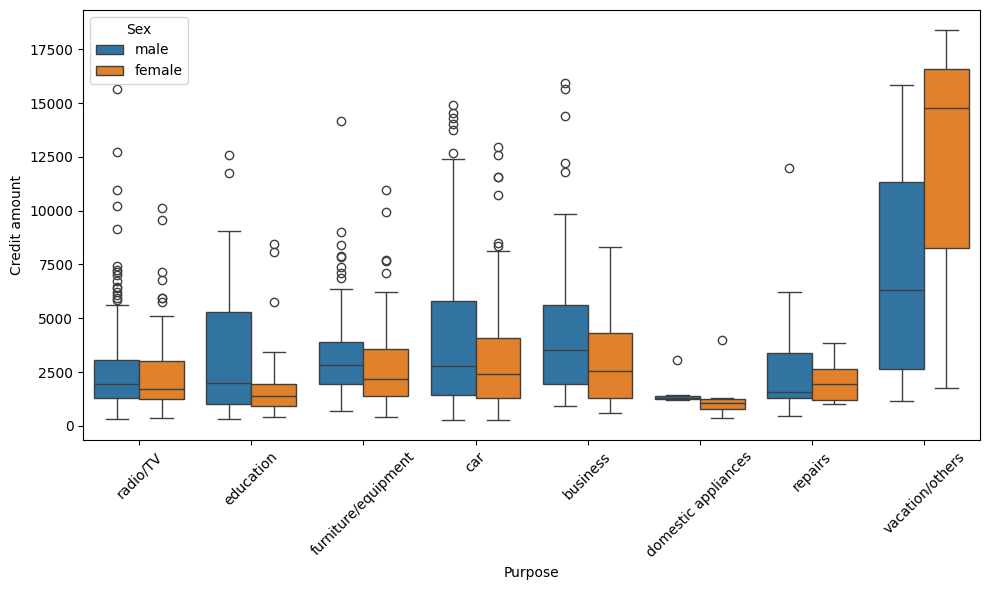

In [ ]:
# Create a boxplot of Purpose, Credit amount and sex.

boxes("Purpose","Credit amount","Sex")

# Insight:
The plot above shows that the biggest amounts are taken for vacations/others, the smallest for domestic appliances. Most of them have outliers on the upper side of the boxes (higher amounts).

The difference between men and women is insignificant in the radio/TV category. The following categories saw men taking higher credit amounts:

Education.

Furniture/equipment.

Car.

Repairs.

The following categories saw women taking higher credit amounts:

Vacation/other.

These observations might indicate which purposes are mostly valued by men and women and should be a compass for the sales Team leaders in the banks on their strategies and resource allocations.

However, there was very little number of credits granted in this category.

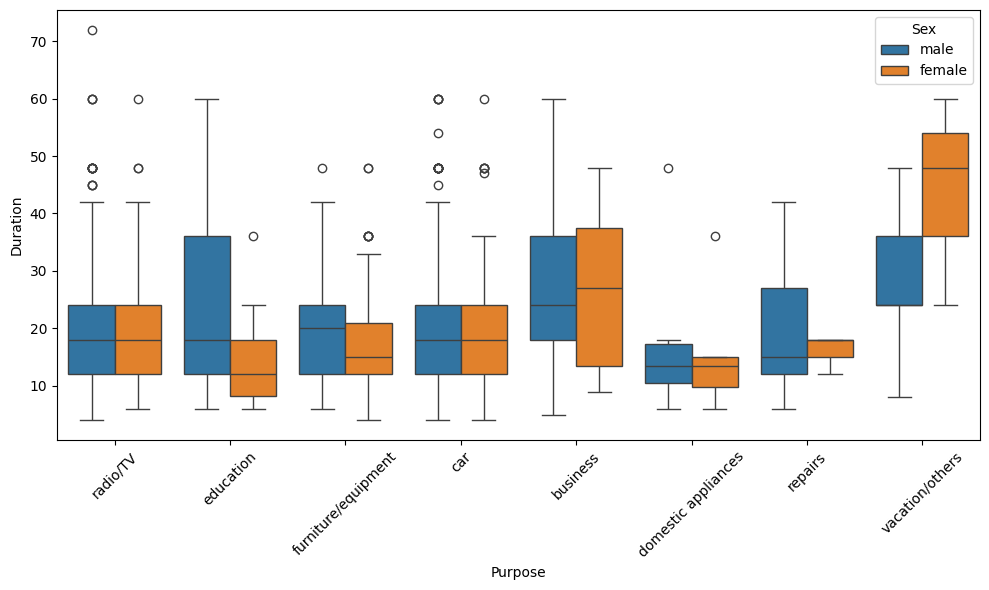

In [ ]:
boxes("Purpose","Duration","Sex")

# Insight:
The visualization above indicates that although in some cases such as business loans, men get higher amounts, women get longer credit duration on their loans.

In some cases men have higher credit amounts but get the same credit duration such as car loans.

Some observations are consistent such as higher loan durations for men in the education, furniture/equipment and repair loans loans compared to women.

The vacation/other loans saw that women had higher loan durations compared to men consistent with loan amounts.

These observations might be due to bank policies, agreements with relationship managers, unique customer profiles, difference in loan products and customer preference.

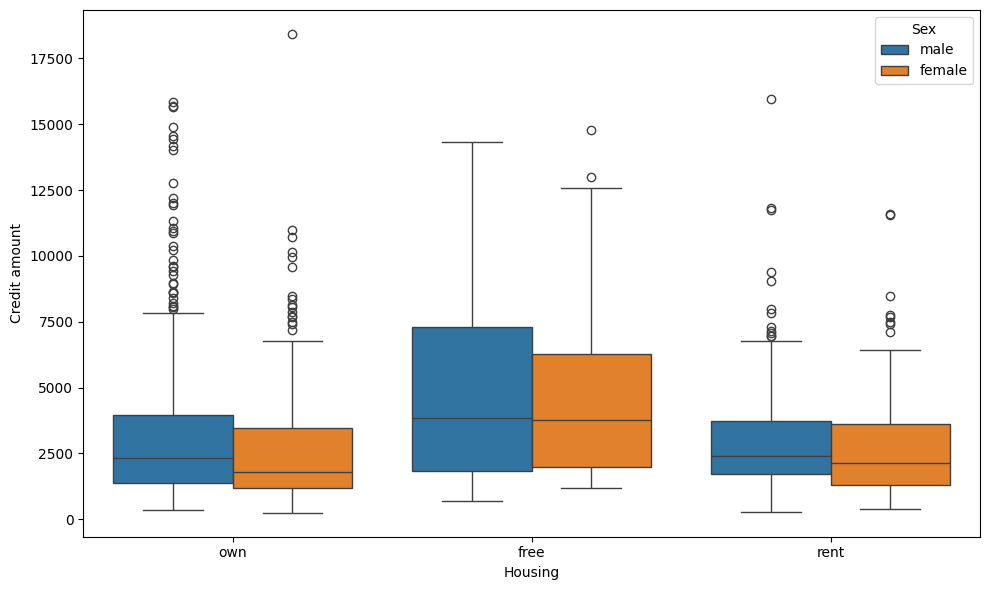

In [ ]:
boxes("Housing","Credit amount","Sex",r=0)

# Insight:
Males had higher credit amounts whether they owned, rented or lived in free living spaces however the greatest outlier was observed at a female who owned a home. She had the highest credit amount overall.

Those who lived in free-housing spaces had the highest credit amounts overall.

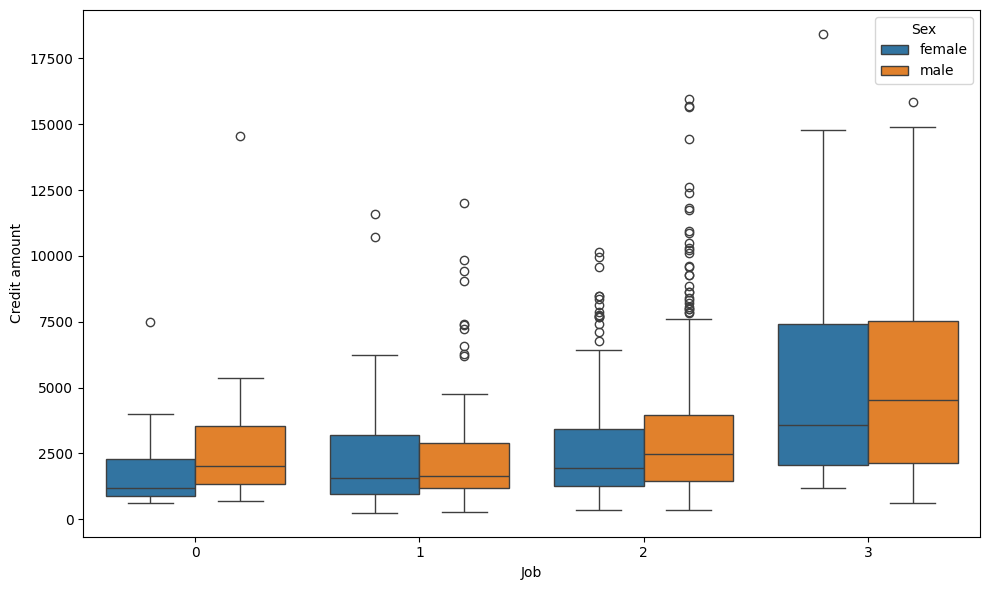

In [ ]:
boxes("Job","Credit amount","Sex",r=0)

# Insight:
Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

The customers with high skill jobs had the highest credit amounts for both men and women which makes sense because they would be observed to have the greatest stability and maybe highest income.

For customers who lacked employment, the men still had higher credit amounts compared to the women while for customers working skilled jobs the males also had a higher credit amount compared to the women which was contrary to what was observed for customers who had unskilled and resident source of income.

In [ ]:
# Selecting columns for clusterisation

# variables have been chosen as they have been selected to define the customers the most thus utilized to cluster customers into various groups.

selected_cols = ["Age","Credit amount", "Duration"]
cluster_data = df.loc[:,selected_cols]

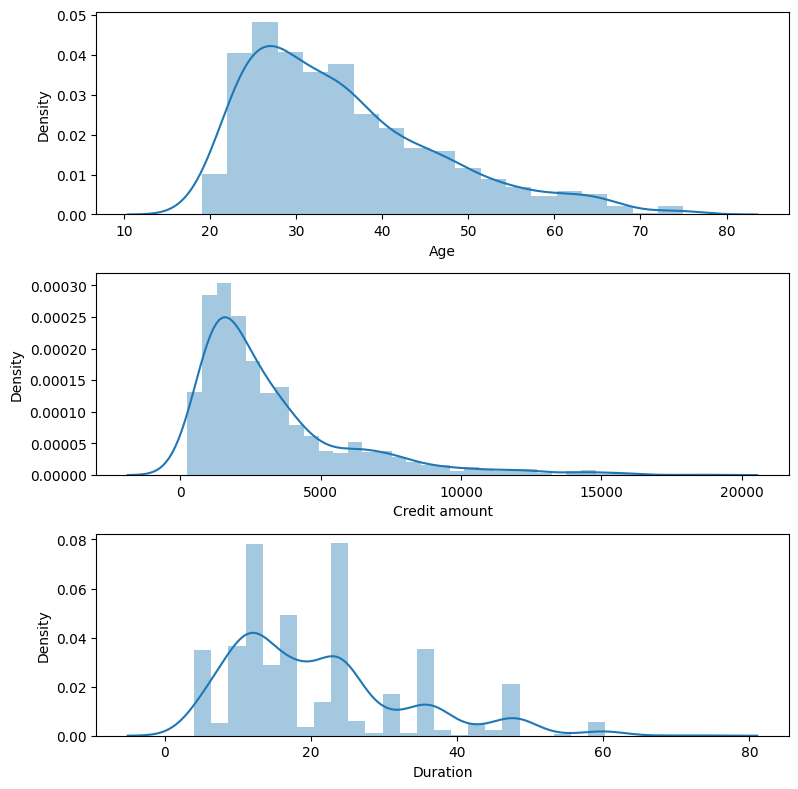

In [ ]:
# Defining a function which plots three histograms - one for each variable.

def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(df["Age"], ax=ax1)
    sns.distplot(df["Credit amount"], ax=ax2)
    sns.distplot(df["Duration"], ax=ax3)
    plt.tight_layout()
# The distribution of data withing the cluster chosen variables.

distributions(cluster_data)

# Insight:
We can observe that the variable distributions are more right-skewed i.e. for age, more consumers are younger, for the credit amount and duration most of the consumers have access to lower credit amounts and duration.

Because of this we should remove the skewness by logarithmic transformation as a form of normalization.

This is done to eliminate redundant data (outliers) and ensures that good quality clusters are generated which can improve the efficiency of clustering algorithms.

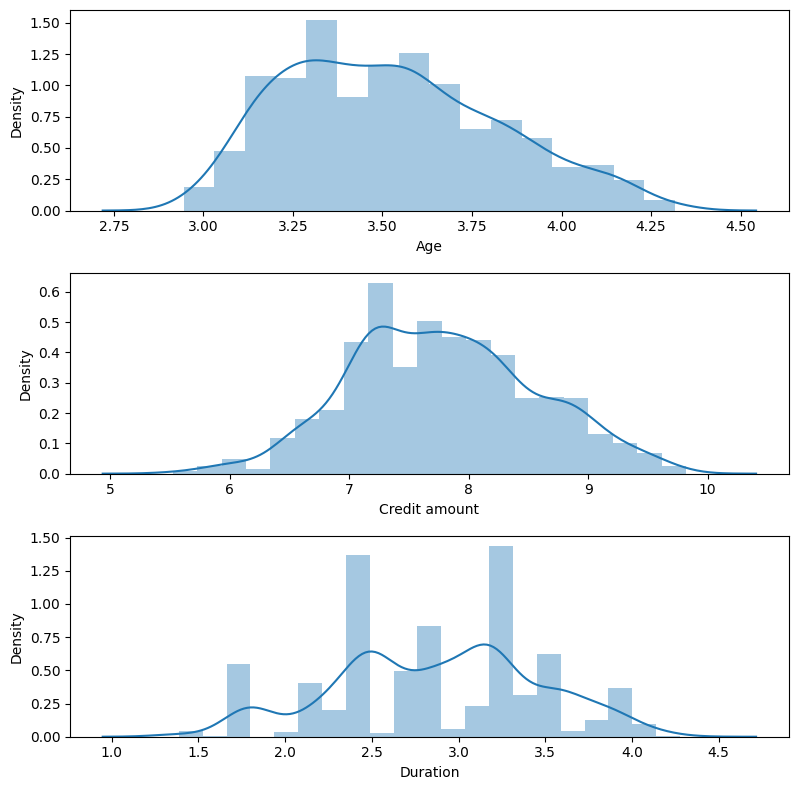

In [ ]:
# Eliminating skewness using logarithmic transformation.

cluster_log = np.log(cluster_data)
distributions(cluster_log)

# Insight:
Its visible that the data is more centered because the distribution is more centered.


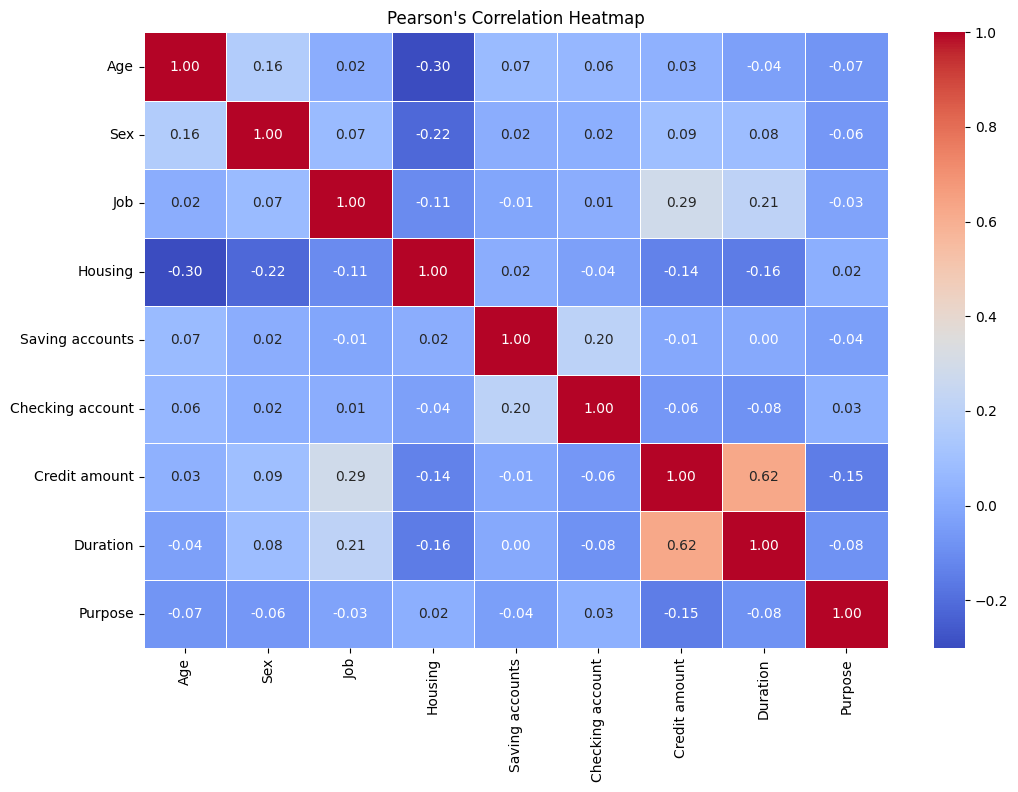

In [ ]:
 # Creating a correlation heatmap.

# Calculate the correlation matrix
correlation_matrix = df_num.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Display the heatmap
plt.title("Pearson's Correlation Heatmap")
plt.show()

# Insights:
Majority of the variables are not significantly correlated to each other except Credit amount and duration which is expected as per bank practices i.e. the higher your credit amount the higher the chances that you have a longer repayment period/can negotiate with the bank for an extension on repayment.
The 'Job' variable is slightly correlated with 'Credit amount' and 'Duration' which is also expected. The more the number of jobs a customer has the higher the credit amounts.

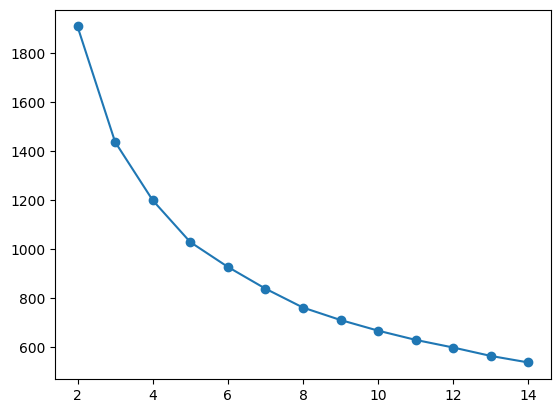

In [ ]:
# Using StandardScaler (Sklearn) to standardize the variables.

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_log)
# Observation of inertia with increase in the number of clusters via a line plot.

clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(cluster_scaled)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range,inertias, marker='o')

# Insights:
Inertia is calculated as the sum of squared distance for each point to its closest centroid, i.e., its assigned cluster.

Inertia is desired to decrease with increase in the number of clusters i.e. the sum of squared distance to decrease because the less the inertia the closer the point to the cluster mean which is the group mean (its fit in the cluster).

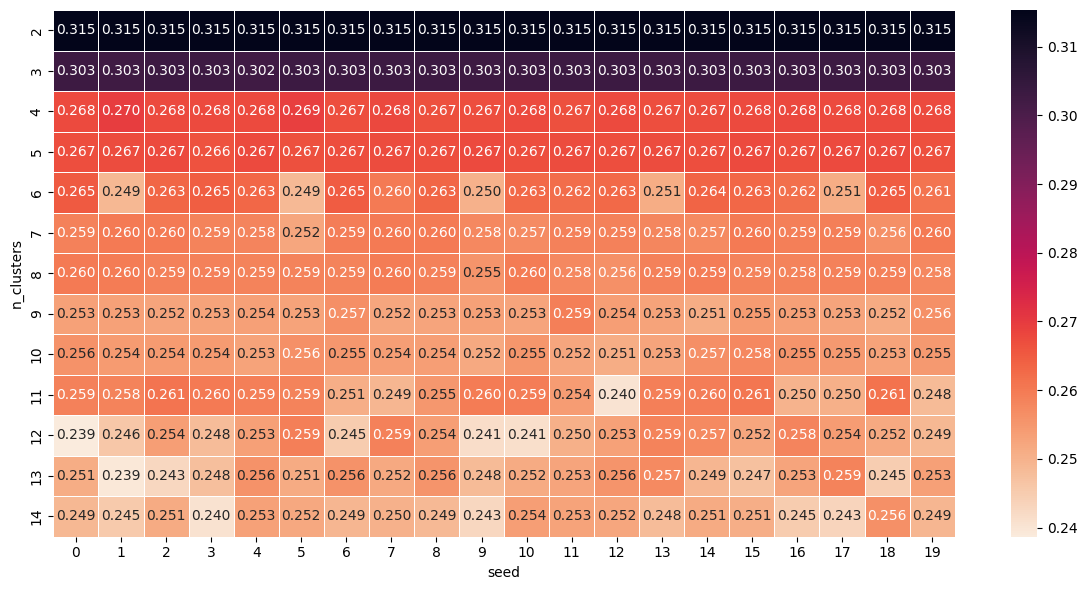

In [ ]:
# Finding the best fit (optimum) cluster through silhouette scoring that uses random seed cluster sampling (2-15 clusters) and layout results in a heatmap.

from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,15)
random_range = range(0,20)
results =[]
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(cluster_scaled)
        silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
        #print("For n_clusters =", c," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)
        results.append([c,r,silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(12,6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

# Insights:
The heatmap above shows silhouette scores for various combinations of random state and number of clusters.

The highest scores are for 2 and 3 clusters and they are relatively insensitive to seed.

3 clusters will be selected for this data exploration.

About Silhouette Scoring.

This metric of validating clustering uses Euclidean distance (the length of the line segment between two points) or manhattan distance (absolute difference of their cartesian points) to determine the cohesion within the cluster (mean distance of a point and all other points within the cluster) and separation from the other clusters (minimum mean distance of a point and all other points within other clusters).

The silhouette score is finally defined as the standardized difference between separation and cohesion. The larger the score the greater the distinction between the clusters and the more optimum the number of clusters are.

The best silhouette distance is the value closes to +1.

For n_clusters = 3  and seed = 19 
The average silhouette_score is : 0.30255813750380023


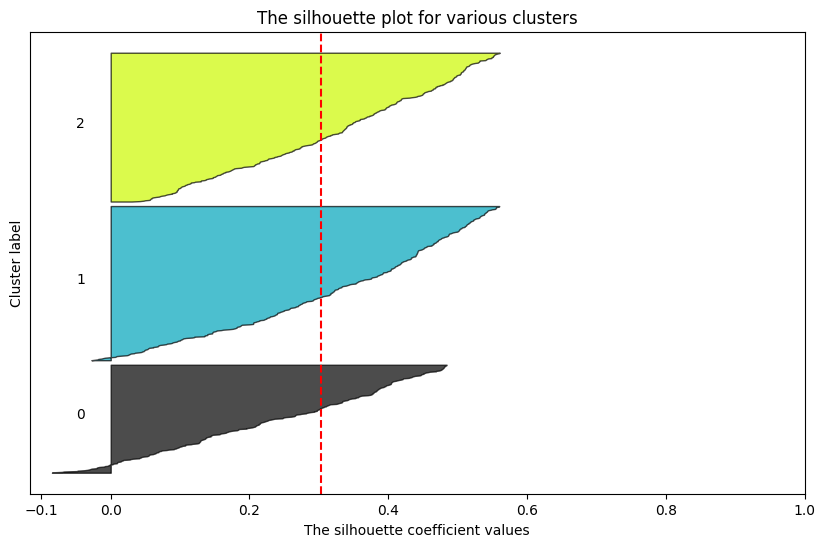

In [ ]:
# Selecting 3 clusters for K-means clustering.

kmeans_sel = KMeans(n_clusters=3, random_state=1).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)
# Plot silhouette graph for 3 clusters so as to show optimization/fit within the three clusters.

import matplotlib.cm as cm

clusterer = KMeans(n_clusters=3, random_state=1)
cluster_labels = clusterer.fit_predict(cluster_scaled)
silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
print("For n_clusters =", 3," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(cluster_scaled, cluster_labels)

fig, ax1 = plt.subplots(figsize=(10,6))

y_lower = 10
for i in range(3):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values, facecolor=color, edgecolor="black", alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.get_yaxis().set_ticks([])
ax1.set_title("The silhouette plot for various clusters")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# Insights:
The plot shows that there are minimal values below 0 indicating that the cluster number selection is quite optimal.

# PCA for Dimensionality Reduction and Visualization:

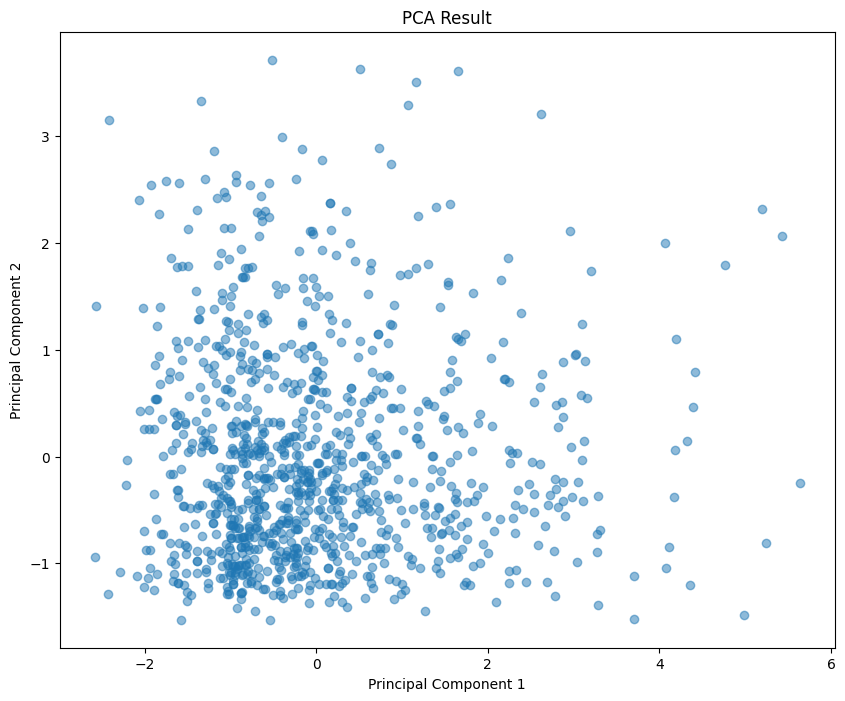

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'X' is your feature matrix (excluding non-numeric and target columns)
X = df.drop(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(pc_df['PC1'], pc_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()


# Insight from Visualization:

Clusters or patterns in the scatter plot suggest inherent structures or groupings in the data. Points that are close together in the plot have similar characteristics based on the principal components.
The proximity of points to the axes (PC1 and PC2) indicates the importance of the corresponding principal components in explaining the variance in the data.

# Statistical Tests:

In [ ]:
from scipy.stats import ttest_ind

# Example: Compare Credit amount between males and females
male_credit = df[df['Sex'] == 'male']['Credit amount']
female_credit = df[df['Sex'] == 'female']['Credit amount']

t_stat, p_value = ttest_ind(male_credit, female_credit)
print(f'T-statistic: {t_stat}, p-value: {p_value}')

T-statistic: 2.966205787131036, p-value: 0.0030868064209731453


# Insights:
T-Statistic:

The t-statistic is a measure of the difference between the means of the two groups (males and females) relative to the spread of the data.
A positive t-statistic indicates that the mean of the 'Credit amount' for males is higher than that for females.

P-Value:

The p-value is the probability of observing a t-statistic as extreme as the one computed, assuming that the null hypothesis is true.
A small p-value (typically less than 0.05) suggests that you have enough evidence to reject the null hypothesis.

# **Model Selection, Training & Evaluation:**

# Split Data into Training and Testing Sets:

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df'
X = df.drop('Purpose', axis=1)  # Features
y = df['Purpose']  # Target variable

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Choose Suitable Algorithms:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize classifiers
rf_classifier = RandomForestClassifier()
svm_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
gb_classifier = GradientBoostingClassifier()


# Select Evaluation Metrics:

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}\n")
    print(f"Classification Report:\n{report}")


# Optimize Hyperparameters:

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest Classifier as an example
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)


In [ ]:
grid_search

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]})

# Save and Load Models:

In [ ]:
import joblib
best_rf_model = grid_search
# Save the model
joblib.dump(best_rf_model, 'best_rf_model.joblib')

# Load the model
loaded_model = joblib.load('best_rf_model.joblib')

In [ ]:
loaded_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]})

# Insights:
Data Preprocessing:

Handled missing values using SimpleImputer with the mean strategy. Ensure this strategy aligns with the characteristics of your data.

Feature Engineering:


Used label encoding for the 'Sex' column and one-hot encoding for selected categorical columns. This is a good practice to handle categorical variables.

Model Selection:


Chosen a RandomForestClassifier, a versatile algorithm suitable for a variety of classification tasks.

Hyperparameter Tuning:


Set up a grid search to find optimal hyperparameters for the RandomForestClassifier using GridSearchCV. This is important for improving model performance.

Pipeline:


The use of Pipeline is beneficial for encapsulating a series of data processing steps and a machine learning model into a single object.

Suggestions:

Data Exploration:


Before preprocessing, it's essential to perform exploratory data analysis (EDA) to gain insights into the distribution of features, identify outliers, and understand relationships between variables.

Feature Scaling:



Depending on the nature of features, consider whether feature scaling (e.g., standardization) is necessary for algorithms like Random Forest. Some algorithms are not sensitive to feature scale, but others might benefit from it.

Evaluation Metrics:


While set up the pipeline for hyperparameter tuning and training, don't forget to evaluate the model's performance on the test set using appropriate metrics. The classification_report is a good start, but consider other metrics based on the specific goals of your project.

Visualization:


Visualize key aspects of the data and model performance, such as feature importances from the trained RandomForestClassifier.

Cross-Validation:


Although GridSearchCV performs cross-validation during hyperparameter tuning, it's good practice to separately perform cross-validation on the entire dataset to get a more robust estimate of model performance.

